## Import Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from PIL import Image

from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import normalize, to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense 


## Load Data

In [4]:
image_directory='mpdataset/'

no_tumor_images=os.listdir('no')
yes_tumor_images=os.listdir('yes')

print('No Tumor: ', len(no_tumor_images))
print('Tumor: ',len(yes_tumor_images))

No Tumor:  1500
Tumor:  1500


In [5]:
dataset=[]
label=[]

INPUT_SIZE=64

## Create labels 

In [7]:
for i , image_name in enumerate(no_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'no/'+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(0)

AttributeError: 'NoneType' object has no attribute '__array_interface__'

In [ ]:
for i , image_name in enumerate(yes_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'yes/'+image_name)
        image=Image.fromarray(image, 'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [ ]:
dataset=np.array(dataset)


NameError: name 'np' is not defined

In [ ]:
label=np.array(label)

print('Dataset: ',len(dataset))
print('Label: ',len(label))

Dataset:  3000
Label:  3000


## Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2, random_state=2023)

## Normalize the Data

In [ ]:
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

## Model Building

In [ ]:
model=Sequential()

model.add(Conv2D(32, (3,3),activation='relu', input_shape=(INPUT_SIZE, INPUT_SIZE, 3)))#relu will convert negative values to 0 and positive remains same
model.add(MaxPooling2D(pool_size=(2,2)))#maxpool reduces the size of matrix 

model.add(Conv2D(32, (3,3),activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3),activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

In [ ]:
# compile the model
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

## Model Fit

In [ ]:
model.fit(X_train, y_train, 
batch_size=32, 
verbose=1, epochs=100, 
validation_data=(X_test, y_test),
shuffle=False)

Epoch 1/100
75/75 [==============================] - 10s 117ms/step - loss: 0.5550 - accuracy: 0.7246 - val_loss: 0.5032 - val_accuracy: 0.7850
Epoch 2/100
75/75 [==============================] - 9s 124ms/step - loss: 0.4443 - accuracy: 0.7975 - val_loss: 0.3727 - val_accuracy: 0.8450
Epoch 3/100
75/75 [==============================] - 9s 116ms/step - loss: 0.3471 - accuracy: 0.8508 - val_loss: 0.2949 - val_accuracy: 0.8767
Epoch 4/100
75/75 [==============================] - 9s 115ms/step - loss: 0.2768 - accuracy: 0.8917 - val_loss: 0.2409 - val_accuracy: 0.9117
Epoch 5/100
75/75 [==============================] - 9s 121ms/step - loss: 0.1983 - accuracy: 0.9296 - val_loss: 0.1821 - val_accuracy: 0.9317
Epoch 6/100
75/75 [==============================] - 9s 114ms/step - loss: 0.1468 - accuracy: 0.9504 - val_loss: 0.1636 - val_accuracy: 0.9383
Epoch 7/100
75/75 [==============================] - 9s 114ms/step - loss: 0.1119 - accuracy: 0.9633 - val_loss: 0.1197 - val_accuracy: 0.958

## Save the Model

In [ ]:
model.save('BrainTumorDetection.h5')

## Load Model 

In [ ]:
model = load_model('BrainTumorDetection.h5')

## Make Prediction on New Data

In [ ]:
def make_prediction(img):
    
    input_img = np.expand_dims(img, axis=0)
    
    res = (model.predict(input_img) > 0.5).astype("int32")
    return res

In [ ]:
def show_result(img):
    img_path = f"{image_directory}pred/{img}"
    image = cv2.imread(img_path)

    img = Image.fromarray(image)

    img = img.resize((64,64))

    img = np.array(img)
    
    plt.imshow(img)
    plt.show()
    
    pred = make_prediction(img)
    if pred:
        print("Tumor Detected")
    else:
        print("No Tumor")


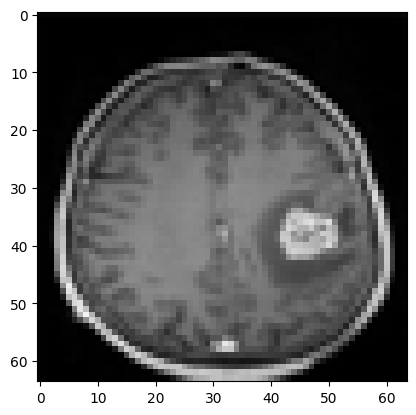

1/1 [==============================] - 0s 94ms/step
Tumor Detected


In [ ]:
show_result('pred8.jpg')